# House Prices Analysis

1. Univariate Analysis
- How many different types of dwellings are there?
- What is the lot area (sq ft) of these dwellings?
- What is the distribution of sale prices?

2. Bivariate Analysis 
- How does the type of dwelling effect the sale price?
- How does the lot area effect the sale price?

3. Multivariate Analysis
- What numeric features correlate with sale price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [2]:
train_df = pd.read_csv("/Users/sa17/Desktop/house-prices-regression/data/train.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.shape

(1460, 81)

In [6]:
null_values = train_df.isna().sum()

null_values[null_values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Dropping Alley, MasVnrType, FireplaceQu, PoolQC, Fence, and MiscFeature due to majority of the values being null

## 1. Univariate Analysis


How many different types of dwellings are there?

In [7]:
dwelling = train_df["MSSubClass"].value_counts()

dwelling

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [8]:
# Rename value to its actual name for better clarity 
ms_subclass = {
    20: "1-STORY 1946+",  
    30: "1-STORY PRE-1946",
    40: "1-STORY W/FINISHED ATTIC",
    45: "1-1/2 STORY UNFINISHED",
    50: "1-1/2 STORY FINISHED",
    60: "2-STORY 1946+",
    70: "2-STORY PRE-1946",
    75: "2-1/2 STORY",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX",
    120: "1-STORY PUD 1946+",
    150: "1-1/2 STORY PUD",
    160: "2-STORY PUD 1946+",
    180: "PUD - MULTILEVEL",
    190: "2 FAMILY CONVERSION"
}

# Add it as a new column to the dataframe 
train_df["MSSubClassName"] = train_df["MSSubClass"].map(ms_subclass)

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClassName
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2-STORY 1946+
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1-STORY 1946+
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2-STORY 1946+
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2-STORY PRE-1946
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2-STORY 1946+


In [9]:
dwelling = train_df["MSSubClassName"].value_counts()

dwelling

MSSubClassName
1-STORY 1946+               536
2-STORY 1946+               299
1-1/2 STORY FINISHED        144
1-STORY PUD 1946+            87
1-STORY PRE-1946             69
2-STORY PUD 1946+            63
2-STORY PRE-1946             60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT FOYER                  20
2-1/2 STORY                  16
1-1/2 STORY UNFINISHED       12
PUD - MULTILEVEL             10
1-STORY W/FINISHED ATTIC      4
Name: count, dtype: int64

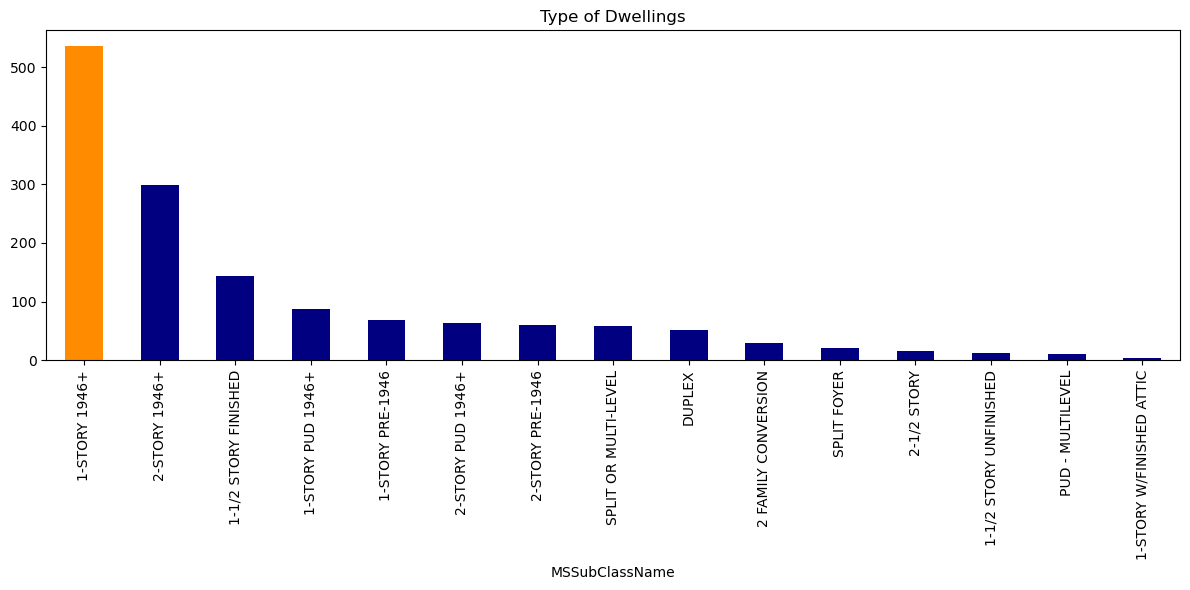

In [10]:
max_type = dwelling.max()

# Assign colors: orange for the max value, blue for others
colors = ["darkorange" if count == max_type else "navy" for count in dwelling]

# Plot the types of dwellings
plt.figure(figsize=(12, 6))
dwelling.plot(kind="bar", color=colors)
plt.title("Type of Dwellings")
plt.tight_layout()
plt.show()

There are 15 different types of dwellings. 1 story dwellings from 1946 and up are seen the most.

What is the lot area (sq ft) of these dwellings?

In [11]:
area = train_df["LotArea"].value_counts().to_frame()

area

,count
LotArea,
7200,25
9600,24
6000,17
9000,14
8400,14
...,...
14601,1
13682,1
4058,1


In [12]:
# Create bins from 0 to the max by 10,000
max_area = train_df["LotArea"].max()

ten = 10_000

area_bins = np.arange(0, (max_area // ten + 2) * ten, ten)

# Bin LotArea and count how many fall into each bin
train_df["Area"] = pd.cut(train_df["LotArea"], bins=area_bins)

area_df = train_df["Area"].value_counts().to_frame(name="Count")

area_df

,Count
Area,
"(0, 10000]",842
"(10000, 20000]",565
"(20000, 30000]",31
"(30000, 40000]",8
"(50000, 60000]",5
"(40000, 50000]",3
"(160000, 170000]",1
"(150000, 160000]",1
"(110000, 120000]",1


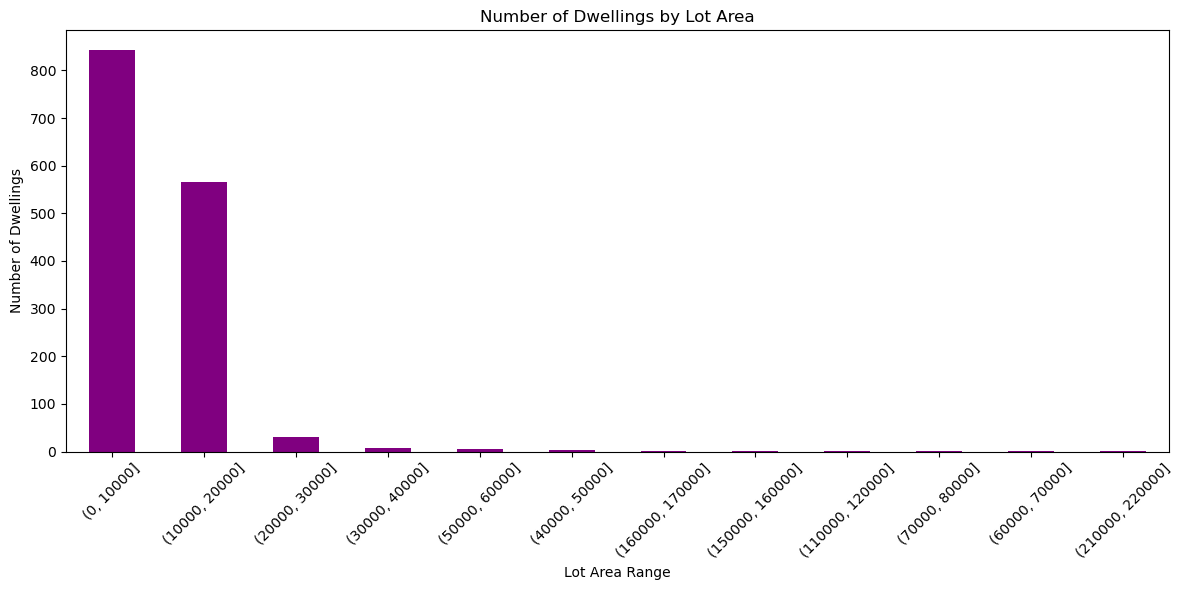

In [13]:
# Plot the number of dwellings by lot area but only include values greater than zero
area_df = area_df[area_df["Count"] > 0]

plt.figure(figsize=(12, 6))
area_df["Count"].plot(kind="bar", color="purple")
plt.title("Number of Dwellings by Lot Area")
plt.xlabel("Lot Area Range")
plt.ylabel("Number of Dwellings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most of the dwellings lot area fall between 0–10,000 sq ft and 10,000–20,000 sq ft. Beyond 20,000 sq ft, the number of dwellings drops rapidly showcasing how rare these type of dwellings are.

What is the distribution of sale prices?

In [14]:

train_df["SalePrice"].value_counts().to_frame()

,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13
...,...
202665,1
164900,1
208300,1


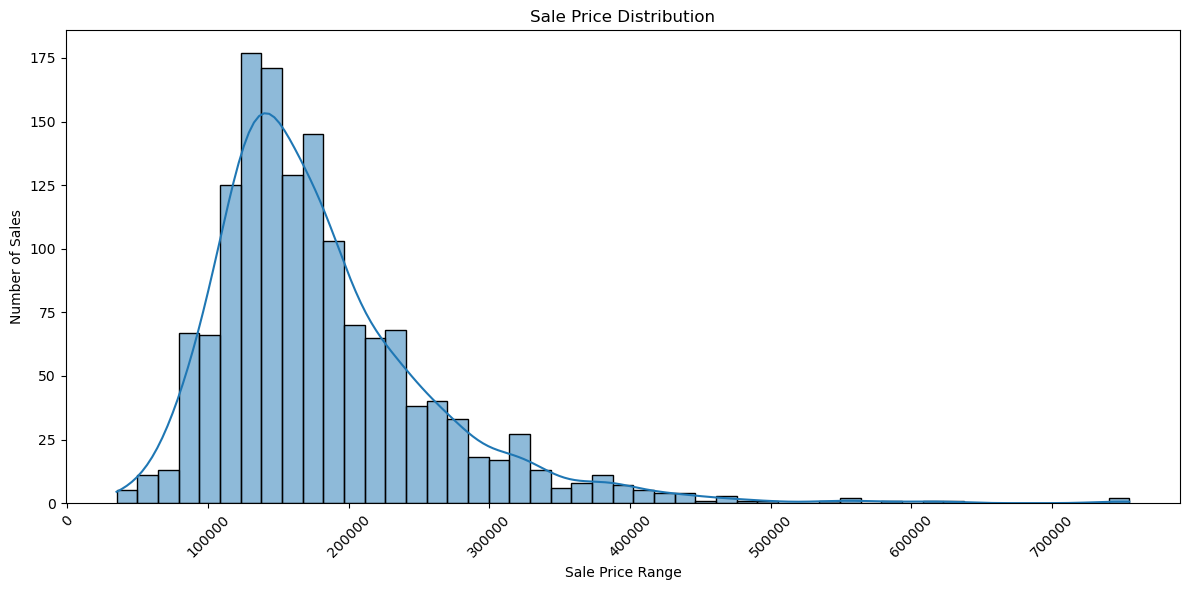

In [15]:
# Plot sale prices
plt.figure(figsize=(12, 6))
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price Range")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority of the dwellings fall in the price range between 100,000 and 200,000. There are only 4 houses higher than 600,000 which could be outliers.

## 2. Bivariate Analysis 

How does the type of dwelling effect the sale price?

In [22]:
prices = train_df["SalePrice"].value_counts().to_frame()

prices.head()

,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13


In [23]:
# Create bins from 0 to the max by $100,000 
max_price = train_df["SalePrice"].max()

hundred = 100_000

price_bins = np.arange(0, (max_price // hundred + 2) * hundred, hundred)


# Bin the prices and count how many fall into each bin
train_df["Price"] = pd.cut(train_df["SalePrice"], bins=price_bins)

price_df = train_df["Price"].value_counts().to_frame(name="Count")

price_df

,Count
Price,
"(100000, 200000]",910
"(200000, 300000]",312
"(0, 100000]",123
"(300000, 400000]",87
"(400000, 500000]",19
"(500000, 600000]",5
"(600000, 700000]",2
"(700000, 800000]",2


In [24]:
# Group by price and dwelling type
dwelling_counts = train_df.groupby(["Price", "MSSubClassName"], observed=True).size().unstack(fill_value=0)

dwelling_counts


MSSubClassName,1-1/2 STORY FINISHED,1-1/2 STORY UNFINISHED,1-STORY 1946+,1-STORY PRE-1946,1-STORY PUD 1946+,1-STORY W/FINISHED ATTIC,2 FAMILY CONVERSION,2-1/2 STORY,2-STORY 1946+,2-STORY PRE-1946,2-STORY PUD 1946+,DUPLEX,PUD - MULTILEVEL,SPLIT FOYER,SPLIT OR MULTI-LEVEL
Price,,,,,,,,,,,,,,,
"(0, 100000]",18,4,24,39,1,1,6,0,0,4,12,7,7,0,0
"(100000, 200000]",109,8,343,30,51,2,23,11,121,42,49,44,3,20,54
"(200000, 300000]",13,0,120,0,29,1,1,3,127,12,2,1,0,0,3
"(300000, 400000]",3,0,39,0,6,0,0,1,35,2,0,0,0,0,1
"(400000, 500000]",1,0,7,0,0,0,0,1,10,0,0,0,0,0,0
"(500000, 600000]",0,0,2,0,0,0,0,0,3,0,0,0,0,0,0
"(600000, 700000]",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
"(700000, 800000]",0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


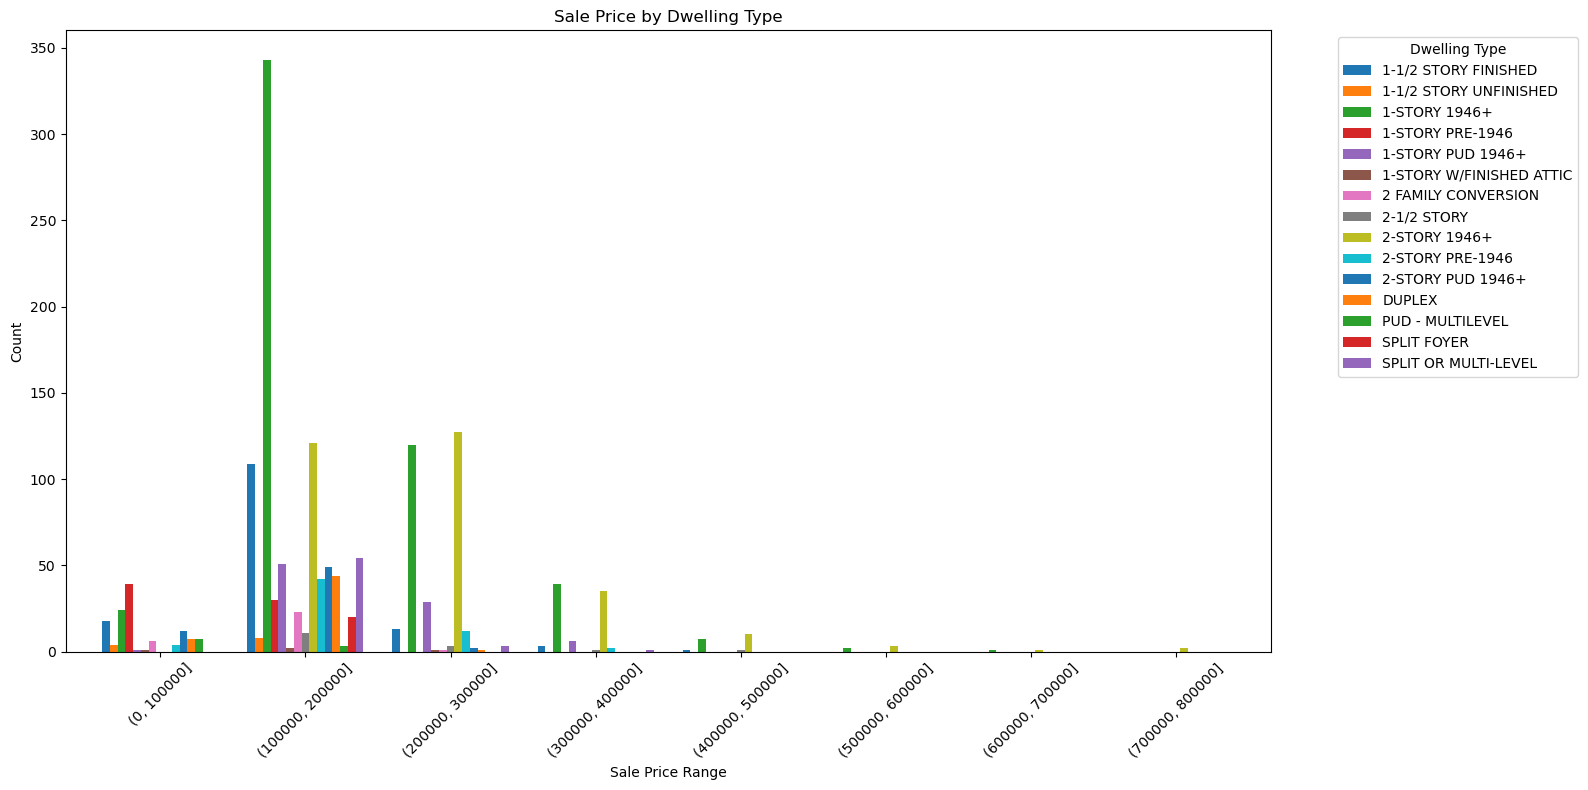

In [25]:
# Plot grouped bar chart
ax = dwelling_counts.plot(kind="bar", figsize=(16, 8), width=0.8)

plt.title("Sale Price by Dwelling Type")
plt.xlabel("Sale Price Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Dwelling Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Most homes sold are 1-story 1946 and newer in the 100,000–300,000 range. Older, converted, or multifamily dwellings cluster below 100,000. Expensive homes are rarer and mostly newer, large 2-story or PUD-style units. Some types such as Split-levels, Duplexes are minor dwellings in this market.



Text(0.5, 1.0, 'Sale Price by Dwelling Type')

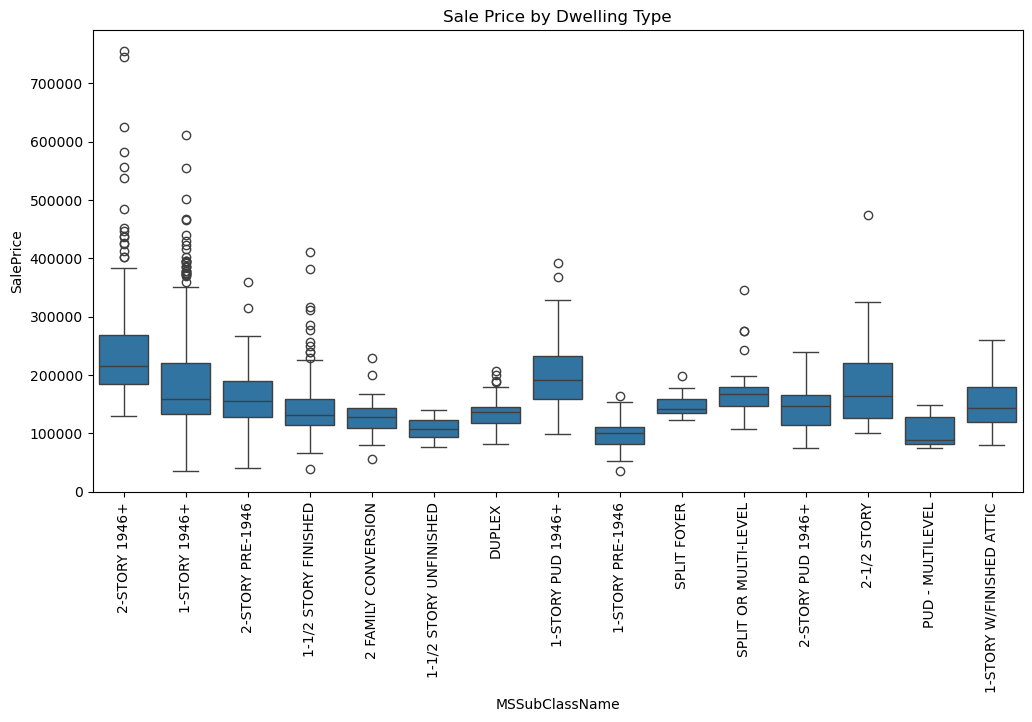

In [ ]:
# Dwelling Type vs SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x="MSSubClassName", y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title("Sale Price by Dwelling Type") 

How does the lot area effect the sale price?

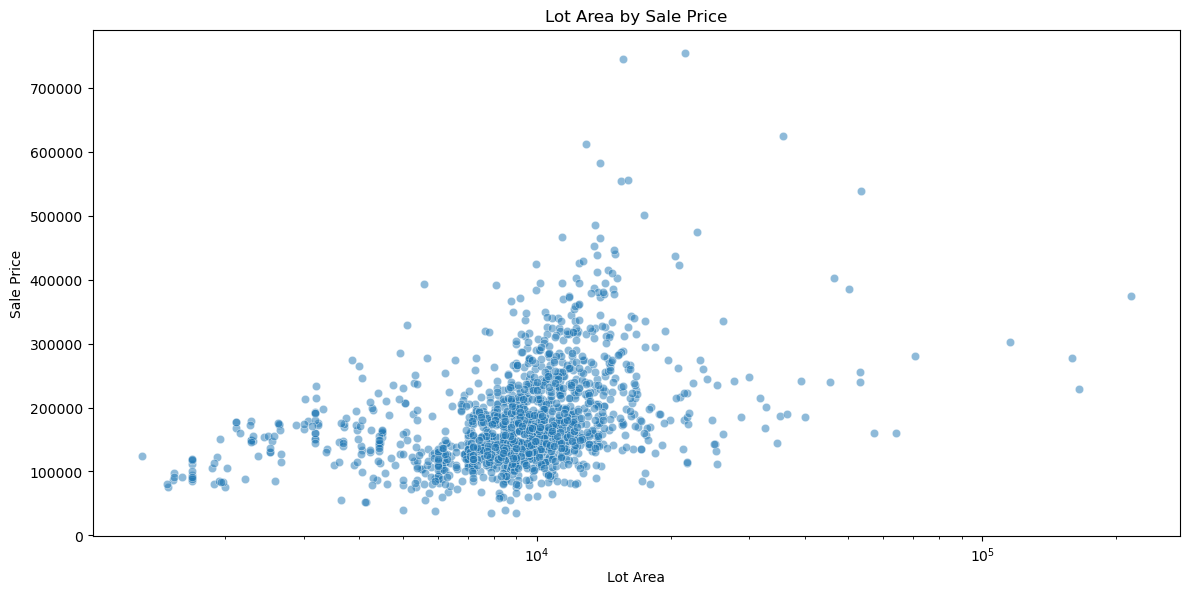

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_df, x="LotArea", y="SalePrice", alpha=0.5)
plt.title("Lot Area by Sale Price")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.xscale("log")
plt.show()

There’s a loose upward trend. Larger lot sizes can increase SalePrice, but not always.

## 3. Multivariate Analysis 

What numeric features correlate with sale price?

In [ ]:
# Dropping columns with majority null values
train_df = train_df.drop(columns=["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])

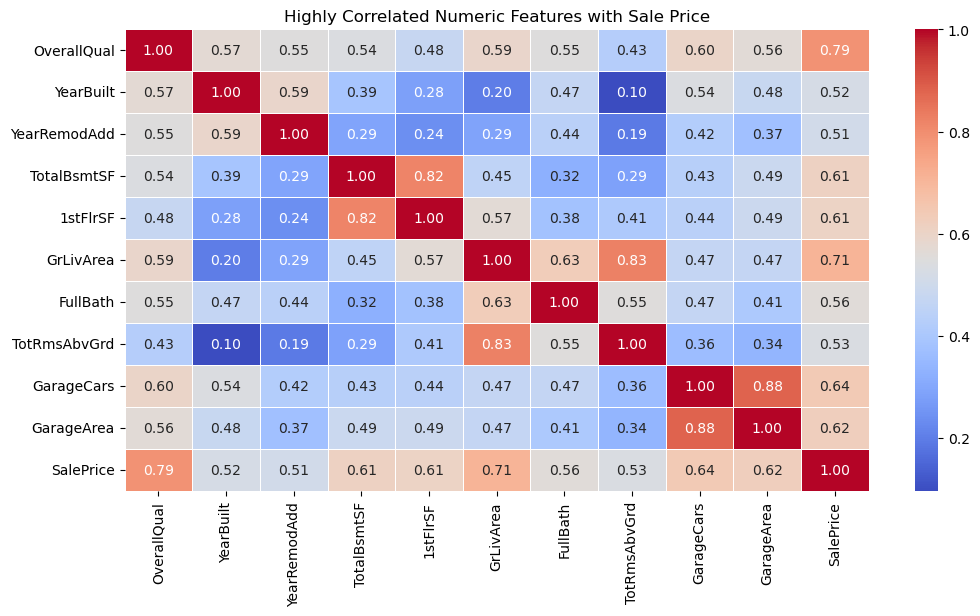

In [33]:
# Select only numerical columns for correlation

numeric_cols = train_df.select_dtypes(include=["number"]).columns
corr = train_df[numeric_cols].corr()

# Select only the feaatures that are highly correlated with Sale Price
top_corr = corr.index[abs(corr["SalePrice"]) > 0.5]

# Heatmap of correlation 
plt.figure(figsize=(12, 6))
sns.heatmap(train_df[top_corr].corr(), annot=True, cmap="coolwarm",  fmt=".2f", linewidths=0.5)
plt.title("Highly Correlated Numeric Features with Sale Price")
plt.show()

The strongest correlation of sale price is OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmt and 1stFlrsf.

## Hypothesis Based off Graphs 

Homes with higher overall quality (OverallQual) have significantly higher sale prices